In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import k_means


In [3]:
# path = '/'.join

In [4]:
df = pd.read_csv('Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [5]:
df = df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [6]:
two_column = df[['Years Employed', 'Income']]
two_column.head()

,Years Employed,Income
0,6,19
1,26,100
2,10,57
3,4,19
4,31,253


In [7]:
two_column.describe()

,Years Employed,Income
count,850.000000,850.000000
mean,8.565882,46.675294
std,6.777884,38.543054
min,0.000000,13.000000
25%,3.000000,24.000000
50%,7.000000,35.000000
75%,13.000000,55.750000
max,33.000000,446.000000


In [8]:
two_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Years Employed  850 non-null    int64
 1   Income          850 non-null    int64
dtypes: int64(2)
memory usage: 13.4 KB


In [9]:
two_column['Income'].value_counts().head()

Income
21    28
25    27
26    27
22    26
27    25
Name: count, dtype: int64

In [10]:
two_column['Years Employed'].value_counts


<bound method IndexOpsMixin.value_counts of 0       6
1      26
2      10
3       4
4      31
       ..
845     5
846     7
847     0
848    12
849    16
Name: Years Employed, Length: 850, dtype: int64>

In [11]:
two_column.isnull().sum()

Years Employed    0
Income            0
dtype: int64

In [12]:
gropp_sum = two_column.groupby('Years Employed')['Income'].sum()

<Axes: >

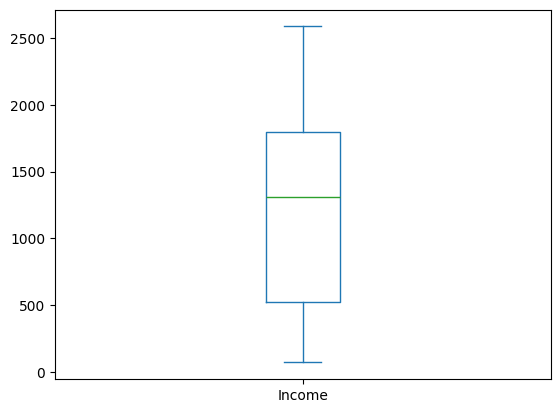

In [13]:
gropp_sum.plot(kind='box')


In [14]:
gropp_mean = two_column.groupby('Years Employed')['Income'].mean()

<Axes: ylabel='Income'>

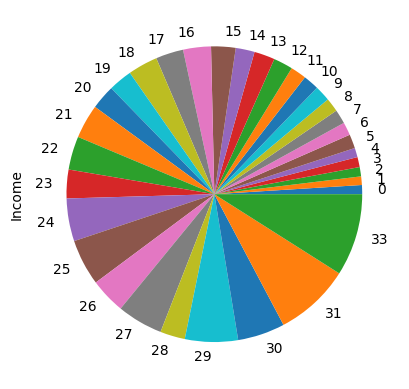

In [15]:
gropp_mean.plot(kind='pie')


In [16]:
x = two_column.drop('Income', axis=1)
y = two_column['Income']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


We normalize the training and test data using the preprocessing.normalize() method from sklearn. 

In [19]:
from sklearn.preprocessing import StandardScaler

X_train_norm = StandardScaler()
X_train_norm.fit_transform(x)


array([[-0.37878978],
       [ 2.5737211 ],
       [ 0.2117124 ],
       [-0.67404087],
       [ 3.31184882],
       [ 2.13084447],
       [-0.67404087],
       [-1.26454304],
       [-0.52641532],
       [ 2.13084447],
       [-0.08353869],
       [ 0.06408685],
       [-0.23116423],
       [-0.37878978],
       [-0.96929195],
       [-1.1169175 ],
       [-1.1169175 ],
       [-1.1169175 ],
       [ 1.39271675],
       [ 1.09746566],
       [-0.37878978],
       [ 0.2117124 ],
       [-0.37878978],
       [ 1.54034229],
       [ 0.2117124 ],
       [ 0.06408685],
       [-0.67404087],
       [ 1.54034229],
       [ 0.65458903],
       [ 0.06408685],
       [ 1.39271675],
       [ 0.50696349],
       [-1.26454304],
       [-0.52641532],
       [ 0.50696349],
       [-0.52641532],
       [-0.52641532],
       [-1.26454304],
       [-1.1169175 ],
       [ 1.09746566],
       [-0.67404087],
       [ 1.24509121],
       [-0.52641532],
       [ 0.06408685],
       [-0.82166641],
       [ 0

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

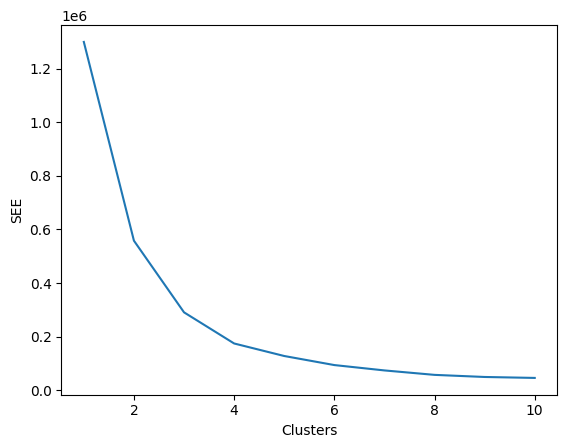

In [21]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(two_column)
    wcss.append(kmean.inertia_)

# plot elbow curve

plt.plot(np.arange(1,11), wcss)
plt.xlabel('Clusters')
plt.ylabel('SEE')

plt.show()

In [24]:
k_means_optimum = KMeans(n_clusters=2)
y = k_means_optimum.fit_predict(two_column)
print(y[:5])

[0 1 0 0 1]


In [23]:
two_column['cluster'] = y
two_column.head()

/tmp/ipykernel_3632/3192883855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_column['cluster'] = y


,Years Employed,Income,cluster
0,6,19,2
1,26,100,0
2,10,57,2
3,4,19,2
4,31,253,1


In [29]:
two_column1 = two_column[two_column.cluster==0]
two_column2 = two_column[two_column.cluster==1]


In [31]:
# # Visualization

# kplot = plt.axes(projection='3d')
# xline = np.linspace(0,15,1000)
# yline = np.linspace(0,15,1000)
# zline = np.linspace(0,15,1000)

# kplot.plot3d(xline, yline,zline)


# kplot.scatter3D(two_column1.Years Employed, two_column1.Income,  c='red', label = 'Cluster 1')

# kplot.scatter3D(two_column2.Years Employed, two_column2.Income,  c='red', label = 'Cluster 1')



In [37]:
score = silhouette_score(two_column, y)
print(score)

0.7349428575719349
